<a href="https://colab.research.google.com/github/AKASH4671/Stock-Return-Forecasting-Using-LSTM-and-Machine-Learning/blob/main/01_EDA_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install and Import Libraries**

In [ ]:
# Install and Import Libraries
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


**Download Stock Price Data (TSLA)**

In [ ]:
# Set the ticker and time range
ticker = "TSLA"
start_date = "2018-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Download data
df = yf.download(ticker, start=start_date, end=end_date)

# Display first few rows
df.head()


/tmp/ipython-input-3-53125845.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2018-01-02,21.368668,21.474001,20.733334,20.799999,65283000
2018-01-03,21.150000,21.683332,21.036667,21.400000,67822500
2018-01-04,20.974667,21.236668,20.378668,20.858000,149194500
2018-01-05,21.105333,21.149332,20.799999,21.108000,68868000
2018-01-08,22.427334,22.468000,21.033333,21.066668,147891000


**Visualize Stock Price Trend**

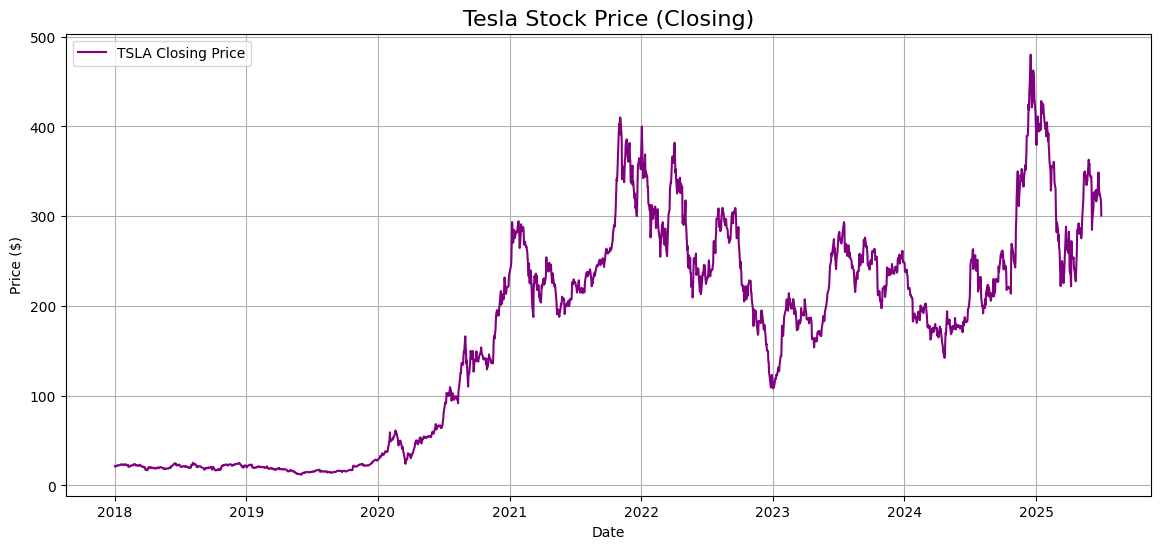

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='TSLA Closing Price', color='purple')
plt.title('Tesla Stock Price (Closing)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


**Add Moving Averages**

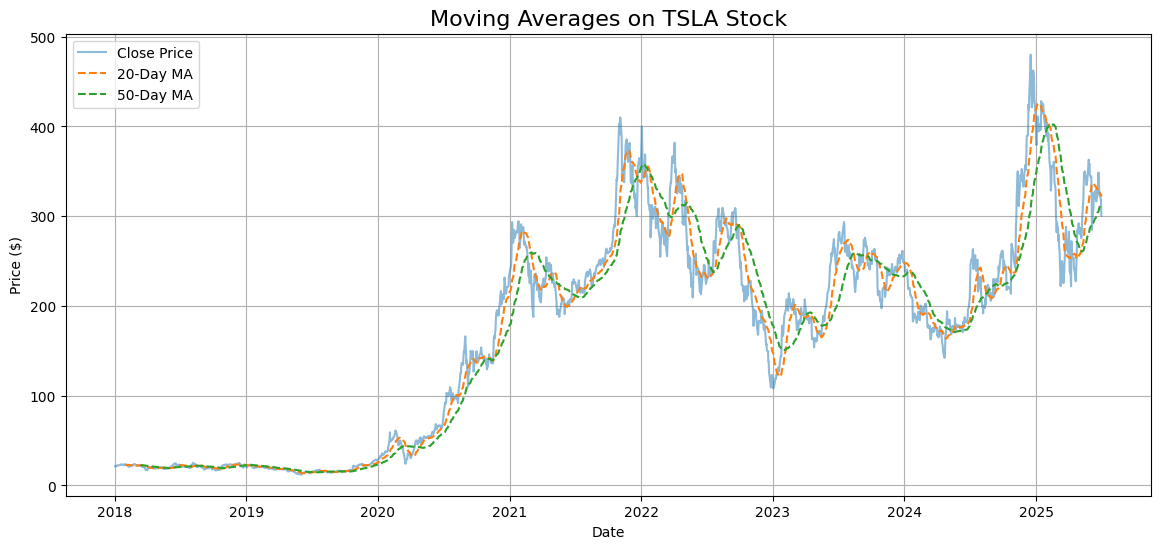

In [ ]:
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['MA_20'], label='20-Day MA', linestyle='--')
plt.plot(df['MA_50'], label='50-Day MA', linestyle='--')
plt.title('Moving Averages on TSLA Stock', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


**Create Features for ML Model**

In [ ]:
# Feature Engineering: Returns and Lag features
df['Return'] = df['Close'].pct_change()
df['Lag_1'] = df['Return'].shift(1)
df['Lag_2'] = df['Return'].shift(2)
df['Lag_3'] = df['Return'].shift(3)

# Drop rows with NaNs
df.dropna(inplace=True)

# Final feature set
features = ['Lag_1', 'Lag_2', 'Lag_3']
target = 'Return'

df_ml = df[features + [target]].copy()
df_ml.head()


Price,Lag_1,Lag_2,Lag_3,Return
Ticker,,,,
Date,,,,
2018-03-14,-0.010622,0.056057,-0.005865,-0.044494
2018-03-15,-0.044494,-0.010622,0.056057,-0.003153
2018-03-16,-0.003153,-0.044494,-0.010622,-0.013053
2018-03-19,-0.013053,-0.003153,-0.044494,-0.024241
2018-03-20,-0.024241,-0.013053,-0.003153,-0.009599


**Save as CSV (Optional for backup)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Save preprocessed data to a folder in Google Drive
output_path = '/content/drive/MyDrive/Colab Notebooks/Finance Projects/Stock-Return-Forecasting-Using-LSTM-and-Machine-Learning/data/tsla_preprocessed.csv'
df_ml.to_csv(output_path, index=False)

print("Saved to:", output_path)


Saved to: /content/drive/MyDrive/Colab Notebooks/Finance Projects/stock-price-prediction-ml/data/tsla_preprocessed.csv
